In [2]:
import pandas as pd 
# %matplotlib inline
import matplotlib.pyplot as plt
import numpy as np


In [3]:
# read csv file 
ml_data = pd.read_csv ('../Data/ML_data.csv')
ml_data

,shire,rainfall.yearToDate,tos_field_ph,Straw Yield /Ha Cereal Crop Average over 5 years
0,albany,10.733333,5.750000,2.53
1,beverley,1.300000,7.500000,2.14
2,bruce rock,16.933333,6.000000,1.04
3,carnamah,0.200000,6.500000,0.85
4,coorow,6.700000,7.000000,0.74
5,dandaragan,3.600000,6.000000,2.98
6,dumbleyung,2.400000,8.000000,1.60
7,gingin,0.400000,6.500000,2.28
8,irwin,0.000000,7.000000,1.98
9,jerramungup,19.666667,6.750000,1.84


In [4]:
ml_data.corr()

,rainfall.yearToDate,tos_field_ph,Straw Yield /Ha Cereal Crop Average over 5 years
rainfall.yearToDate,1.000000,0.347535,-0.602226
tos_field_ph,0.347535,1.000000,-0.372324
Straw Yield /Ha Cereal Crop Average over 5 years,-0.602226,-0.372324,1.000000


In [5]:
X = ml_data[[
    "rainfall.yearToDate", 
    "tos_field_ph", 
    "shire"    
]]

y = ml_data["Straw Yield /Ha Cereal Crop Average over 5 years"].values.reshape(-1,1)

print("Shape: ", X.shape, y.shape)

Shape:  (26, 3) (26, 1)


In [10]:
data = X.copy()

data_encoded = pd.get_dummies(data, columns=["shire"])
data_encoded

,rainfall.yearToDate,tos_field_ph,shire_albany,shire_beverley,shire_bruce rock,shire_carnamah,shire_coorow,shire_dandaragan,shire_dumbleyung,shire_gingin,...,shire_mukinbudin,shire_narembeen,shire_northam,shire_northampton,shire_perenjori,shire_ravensthorpe,shire_three springs,shire_west arthur,shire_westonia,shire_yilgarn
0,10.733333,5.750000,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1.300000,7.500000,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,16.933333,6.000000,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0.200000,6.500000,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,6.700000,7.000000,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,3.600000,6.000000,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
6,2.400000,8.000000,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
7,0.400000,6.500000,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
8,0.000000,7.000000,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,19.666667,6.750000,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Scaling and Normalization

In [13]:
from sklearn.model_selection import train_test_split

X = pd.get_dummies(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

X_train

,rainfall.yearToDate,tos_field_ph,shire_albany,shire_beverley,shire_bruce rock,shire_carnamah,shire_coorow,shire_dandaragan,shire_dumbleyung,shire_gingin,...,shire_mukinbudin,shire_narembeen,shire_northam,shire_northampton,shire_perenjori,shire_ravensthorpe,shire_three springs,shire_west arthur,shire_westonia,shire_yilgarn
1,1.300000,7.500,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
23,0.700000,5.000,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
5,3.600000,6.000,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,16.933333,6.000,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
12,2.300000,6.500,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
15,29.300000,7.750,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0.200000,6.500,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,6.700000,7.000,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
21,24.342857,6.625,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
17,41.400000,9.000,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0


Standard Scaler

In [14]:
from sklearn.preprocessing import StandardScaler
X_scaler = StandardScaler().fit(X_train)
y_scaler = StandardScaler().fit(y_train)

In [15]:
# scale data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)
y_train_scaled = y_scaler.transform(y_train)
y_test_scaled = y_scaler.transform(y_test)

Train the model

In [16]:
# train the model 
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train_scaled, y_train_scaled)
# test the accuracy of the model
model.score(X_test_scaled, y_test_scaled)

0.29296264733078914

In [17]:
# create a shire encoder (Encode categorical features as a one-hot numeric array)
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder()
encoder.fit(ml_data[[
    "shire"
]])

OneHotEncoder()

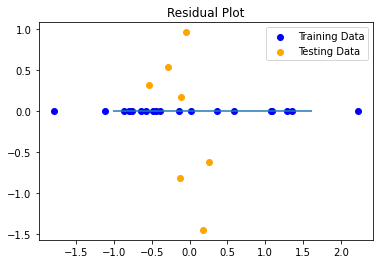

In [25]:
# Plot the results 
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train_scaled, y_train_scaled)
plt.scatter(model.predict(X_train_scaled), model.predict(X_train_scaled) - y_train_scaled, c="blue", label="Training Data")
plt.scatter(model.predict(X_test_scaled), model.predict(X_test_scaled) - y_test_scaled, c="orange", label="Testing Data")
plt.legend()
plt.hlines(y=0, xmin=y_test_scaled.min(), xmax=y_test_scaled.max())
plt.title("Residual Plot")
plt.show()

In [26]:
from sklearn.metrics import mean_absolute_error

predictions = model.predict(X_test_scaled)
MSE = mean_absolute_error(y_test_scaled, predictions)
r2 = model.score(X_test_scaled, y_test_scaled)

print(f"MSE: {MSE}, R2: {r2}")

MSE: 0.6966505727604609, R2: 0.29296264733078914


In [18]:
# create a prediction function 
def predict(model, encoder, X_scaler, y_scaler, user_inputs):
    # get the user input data 
    
    soilpH = user_inputs["tos_field_ph"]
    rain = user_inputs["rainfall.yearToDate"]
    shire = user_inputs ["shire"]
    
    # store shire names into a df 
    shire_input_df = pd.DataFrame({
        "shire": [shire]
    })

    #use encoder to transform the shire df 
    X_transformed = encoder.transform(shire_input_df)
    shire_df = pd.DataFrame(columns=[*encoder.categories_], data=X_transformed.toarray())
    
    # store soilpH and rain into df 
    input_df = pd.DataFrame({
        "tos_field_ph": [soilpH],
        "rainfall.yearToDate": [rain]
    })

    # combine both df's using indexes 
    df = input_df.merge(shire_df, left_index=True, right_index=True)

    # scale the X input df 
    X_scaled = X_scaler.transform(df)

    # obtain prediction (y) 
    prediction_scaled = model.predict(X_scaled)
    
    # scale prediction to human readable terms 
    prediction = y_scaler.inverse_transform(prediction_scaled)
    return prediction 

In [22]:
# test a single prediction 
user_inputs = {
    "tos_field_ph": 6, 
    "rainfall.yearToDate": 5,
    "shire" : "albany"  
}
print(f"predicted straw yield per hectar is: {predict(model, encoder, X_scaler, y_scaler, user_inputs)[0][0].round(2)}")

predicted straw yield per hectar is: 1.59


C:\Users\valen\anaconda3\envs\PythonData\lib\site-packages\sklearn\utils\validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An error will be raised in 1.2.
  FutureWarning,
C:\Users\valen\anaconda3\envs\PythonData\lib\site-packages\sklearn\base.py:451: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  "X does not have valid feature names, but"


In [24]:
#save model 
import joblib 
joblib.dump(model, "../app/static/py/model.sav")
joblib.dump(y_scaler, "../app/static/py/y_scaler.sav")
joblib.dump(X_scaler, "../app/static/py/x_scaler.sav")
joblib.dump(encoder, "../app/static/py/encoder.sav")

['../app/static/py/encoder.sav']